# **Imports and Files**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
import statistics
import scipy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bonds.txt to bonds.txt


In [ ]:
uploaded = files.upload()

Saving spin.txt to spin.txt


# **Simulating an Ising Model**

In [ ]:
def init_spins(bondsFile, spinFile):
  bonds = open(bondsFile).read()
  spins = open(spinFile).read()

In [ ]:
def deltaE(spins, i, j):
  N = len(spins)
  s_before = spins[i][j]
  s_after = -1*spins[i][j]

  nb = spins[(i+1)%N, j] + spins[i,(j+1)%N] + spins[(i-1)%N, j] + spins[i,(j-1)%N]
  return s_before*nb - s_after*nb

In [ ]:
def calcEnergy(config):
    N = len(config)
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return -1*energy/2

In [ ]:
grid = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])
en_diff = deltaE(grid, 1, 1)
before = calcEnergy(grid)
grid[2][1] = -1*grid[2][1]
en_after = calcEnergy(grid)
print('Energy Before: ', before, ' Energy After: ', en_after, ' deltaE: ', en_diff)

Energy Before:  18.0  Energy After:  10.0  deltaE:  8


In [ ]:
def MCMC(num_sweeps, steps, grid, beta):
  grids = []
  for n in range(num_sweeps):
    for i in range(steps):
      rand1 = np.random.randint(0, L)
      rand2 = np.random.randint(0, L)
      energy_diff = deltaE(grid, rand1, rand2)
      prob = np.exp(-beta*energy_diff)
      rand = np.random.rand()
      if(rand < prob):
        grid[rand1][rand2] = -1*grid[rand1][rand2]
    if(n > 10):
      grids.append(grid.copy())
  return grids

In [ ]:
def binaryToDecimal(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

Text(0, 0.5, 'count')

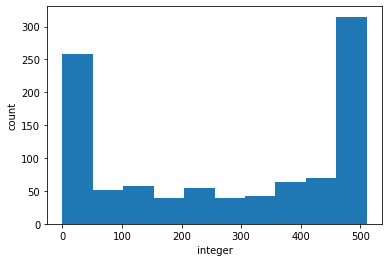

In [ ]:
#3x3 grid histogram of binary numbers
L = 3
ints = []
grid = np.ones((L, L))
steps = L*L
beta = 0.3
num_sweeps = 1000
grids = MCMC(num_sweeps, steps, grid, beta)

for grid in grids:
  oneD = grid.flatten()
  curr = ''
  for i in range(len(oneD)):
    if(oneD[i] == 1):
      curr += '1'
    else:
      curr += '0'
  binary = binaryToDecimal(int(curr))
  ints.append(binary)

plt.hist(ints)
plt.xlabel('integer')
plt.ylabel('count')

In [ ]:
def binToConfig(num):
  spins = []
  size = int(np.sqrt(len(num)))
  for spin in num:
    if(spin == '1'):
      spins.append(1)
    else:
      spins.append(-1)
  spins = np.array(spins)
  return np.reshape(spins, (size, size))

In [ ]:
def addzeros(num, length):
  while len(num) < length:
    num = num + '0'
  return num

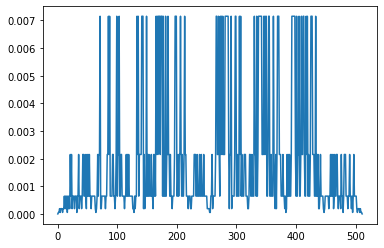

In [ ]:
#theory graph
xs = np.linspace(0, 2**9 - 1, 2**9)
beta = 0.3
probs = []
nums = []
for x in xs:
  binary = bin(int(x)).replace('0b', '')
  binary = addzeros(binary, 9)
  spins = binToConfig(binary)
  energy = calcEnergy(spins)
  probs.append(np.exp(-1*beta*energy))

for prob in probs:
  nums.append((prob/np.sum(probs)))

plt.plot(xs, nums)
plt.show()

# **Measuring an Ising Model**

In [ ]:
def M(spins):
  return np.average(spins)

beta:  0
beta:  0.1
beta:  0.2
beta:  0.3
beta:  0.4
beta:  0.5
beta:  0.6
beta:  0.7
beta:  0.8
beta:  0.9
beta:  1.0


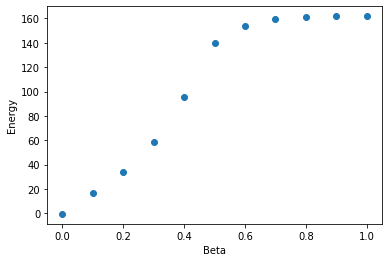

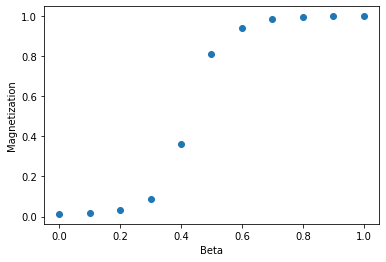

In [ ]:
#9x9 Graph of average E and M^2
L = 9
betaJ = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = np.ones((L, L))
avg_m = []
tau = 4
avg_e = []
errors_e = []
errors_m = []
N = 1000
for beta in betaJ:
  print('beta: ', beta)
  grid = np.ones((L, L))
  steps = L*L
  grids = MCMC(N, steps, grid, beta)

  m, e = [], []
  for grid in grids:
    m.append(M(grid)**2)
    e.append(calcEnergy(grid))

  errors_e.append(statistics.stdev(e)/np.sqrt(N))
  errors_m.append(statistics.stdev(m)/np.sqrt(N))
  avg_m.append(np.average(m))
  avg_e.append(np.average(e))
  #pylab.matshow(grids[-1])

plt.scatter(betaJ, avg_e)
plt.xlabel('Beta')
plt.ylabel('Energy')
plt.show()
plt.scatter(betaJ, avg_m)
plt.xlabel('Beta')
plt.ylabel('Magnetization')
plt.show()

beta:  1000000.0


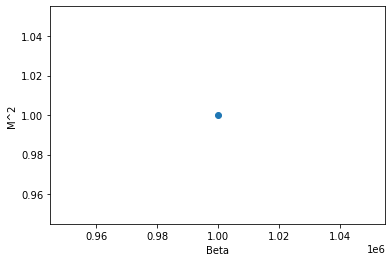

In [ ]:
#27x27 graph of average E and M^2
L = 27
#betaJ = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
betaJ = [1000000.0]
avg_m = []
avg_e = []
errors_e = []
errors_m = []
total_e = []
total_m = []
N = 1000

for beta in betaJ:
  print('beta: ', beta)
  grid = np.ones((L, L))
  steps = L*L
  grids = MCMC(N, steps, grid, beta)

  m, e = [], []
  for grid in grids:
    m.append(M(grid)**2)
    e.append(calcEnergy(grid))
  #if(beta == 0.1):
  total_e.append(e)
  total_m.append(m)

  errors_e.append((statistics.stdev(e)/np.sqrt(N)))
  errors_m.append((statistics.stdev(m)/np.sqrt(N))*10)
  avg_m.append(np.average(m))
  avg_e.append(np.average(e))
  #pylab.matshow(grids[-1])

'''
plt.hist(np.array(total_m).flatten())
plt.xlabel('P(M^2)')
plt.ylabel('Count')
plt.show()
plt.hist(np.array(total_e).flatten())
plt.xlabel('P(E)')
plt.ylabel('Count')
plt.show()
'''
plt.scatter(betaJ, avg_m)
plt.arrow(0.45, 0, 0, 1.0)
plt.xlabel('Beta')
plt.ylabel('M^2')
plt.show()

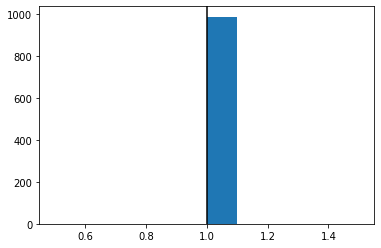

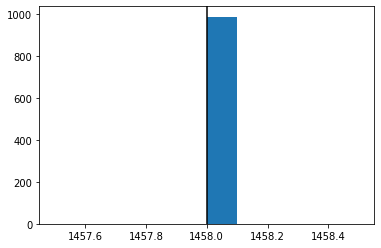

In [ ]:
plt.hist(np.array(total_m).flatten())
plt.axvline(1, color='black')
plt.show()
plt.hist(np.array(total_e).flatten())
plt.axvline(1458, color='black')
plt.show()

[0.0014393987490930972, 0.0019643959841798312, 0.0036738485955851168, 0.01154484970332175, 0.1331102182604048, 0.8287755734214358, 0.9491033049850313, 0.9806200037816558, 0.9922107348064584, 0.9967287369313221, 0.9986209918387202]
[1.3245702730030333, 146.4448938321537, 313.61172901921134, 514.6794742163802, 827.3670374115268, 1271.330637007078, 1392.9079878665318, 1431.7229524772497, 1447.1405460060666, 1453.3609706774519, 1456.0222446916077]


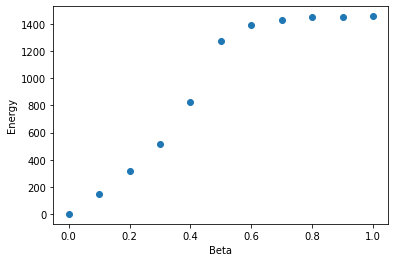

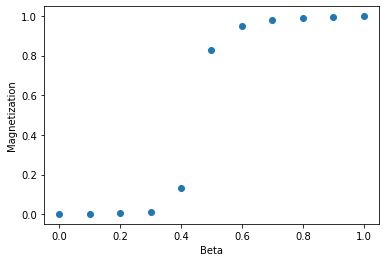

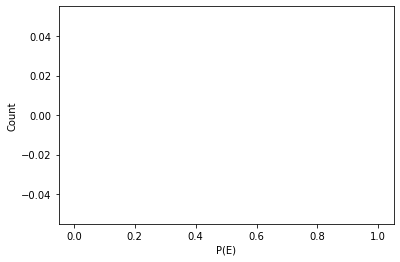

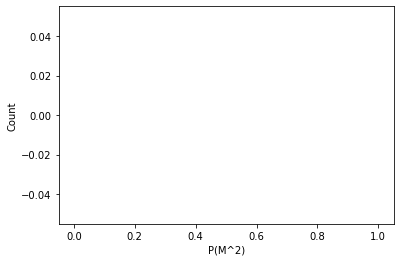

In [ ]:
print(avg_m)
print(avg_e)

plt.scatter(betaJ, avg_e)
plt.xlabel('Beta')
plt.ylabel('Energy')
plt.show()
plt.scatter(betaJ, avg_m)
plt.xlabel('Beta')
plt.ylabel('Magnetization')
plt.show()
plt.hist(np.array(total_e).flatten())
plt.xlabel('P(E)')
plt.ylabel('Count')
plt.show()
plt.hist(np.array(total_m).flatten())
plt.xlabel('P(M^2)')
plt.ylabel('Count')
plt.show()

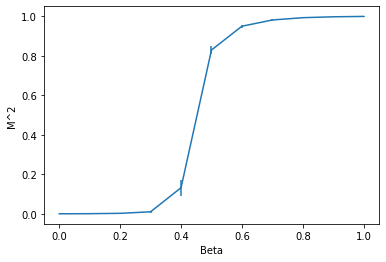

In [ ]:
#magnetization graph with error bars
plt.errorbar(betaJ, avg_m, yerr = errors_m)
plt.xlabel('Beta')
plt.ylabel('M^2')
plt.show()

T:  1.0  Beta:  1.0
T:  1.25  Beta:  0.8
T:  1.5  Beta:  0.6666666666666666
T:  1.7  Beta:  0.5882352941176471
T:  1.85  Beta:  0.5405405405405405
T:  2.0  Beta:  0.5
T:  2.3  Beta:  0.4347826086956522
T:  2.5  Beta:  0.4
T:  3  Beta:  0.3333333333333333
T:  4  Beta:  0.25
T:  5.0  Beta:  0.2
T:  10.0  Beta:  0.1


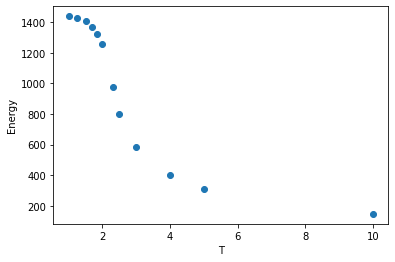

In [ ]:
Ts = [1.0, 1.25, 1.5, 1.7, 1.85, 2.0, 2.3, 2.5, 3, 4, 5.0, 10.0]
L = 27
grid = np.ones((L, L))
avg_m = []
tau = 4
avg_e = []
errors_e = []
errors_m = []
N = 1000
for T in Ts:
  print('T: ', T, ' Beta: ', 1/T)
  grid = np.ones((L, L))
  steps = L*L
  grids = MCMC(N, steps, grid, 1/T)
  m = []
  e = []
  for grid in grids:
    m.append(M(grid)**2)
    e.append(calcEnergy(grid))

  errors_e.append(statistics.stdev(e)/np.sqrt(N/tau))
  errors_m.append(statistics.stdev(m)/np.sqrt(N/tau))
  avg_m.append(np.sum(m)/N)
  avg_e.append(np.sum(e)/N)
  #pylab.matshow(grids[-1])

plt.errorbar(Ts, avg_e, yerr = errors_e, fmt = 'o')
plt.xlabel('T')
plt.ylabel('Energy')
plt.show()

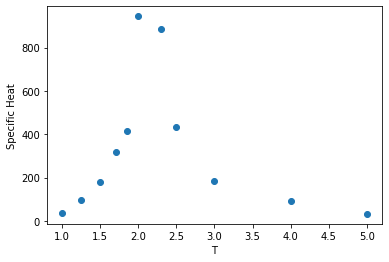

2.0


In [ ]:
slopes = []
for i in range(len(avg_e)-1):
  slopes.append(abs(avg_e[i] - avg_e[i+1])/abs(Ts[i] - Ts[i+1]))

plt.scatter(Ts[:len(Ts)-1], slopes)
plt.xlabel('T')
plt.ylabel('Specific Heat')
plt.show()
print(Ts[5])

# **The Renormalization Group**

In [ ]:
def coarseGrain(spins):
  new_size = int(len(spins)/3)
  output = np.zeros((new_size, new_size))
  for j in range(0, len(spins), 3):
    for i in range(0, len(spins), 3):
      grid = spins[j:j+3, i:i+3]
      avg = np.average(grid)
      if(avg > 0):
        output[int(j/3)][int(i/3)] = 1
      else:
        output[int(j/3)][int(i/3)] = -1
  return output

In [ ]:
L = 6
grid = np.array([[1, -1, 1, -1, -1, -1],
                [-1, 1, -1, 1, 1, -1],
                [1, 1, 1, 1, 1, 1],
                [-1, -1, -1, -1, -1, -1],
                [1, 1, -1, 1, -1, -1],
                [-1, -1, -1, 1, 1, -1]])
grid2 = -1*np.ones((L, L))
print(coarseGrain(grid2))

[[-1. -1.]
 [-1. -1.]]


In [ ]:
#81x81 spin configuration snapshots
L = 81
#betaJ = [0, 0.3, 0.4, 0.5, 0.6, 100000]
betaJ = [0.0, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0]
N = 1000
all_grids = []
for beta in betaJ:
  print('beta: ', beta)
  grid = -1*np.ones((L, L))
  steps = L*L
  grids = MCMC(N, steps, grid, beta)
  all_grids.append(grids)

beta:  0.0
beta:  0.1
beta:  0.2
beta:  0.3
beta:  0.35
beta:  0.4
beta:  0.45
beta:  0.5
beta:  0.6
beta:  0.65
beta:  0.7
beta:  0.8
beta:  0.9
beta:  1.0


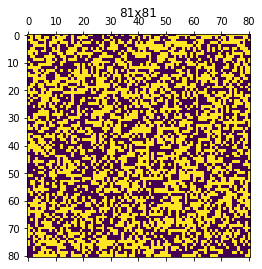

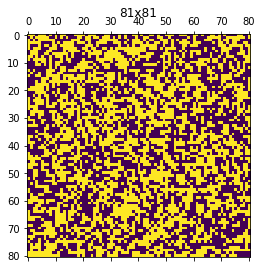

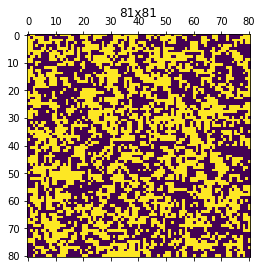

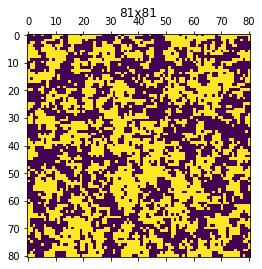

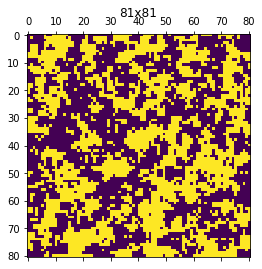

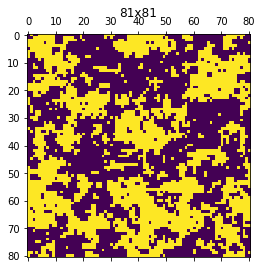

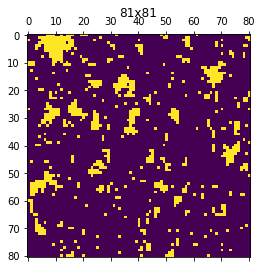

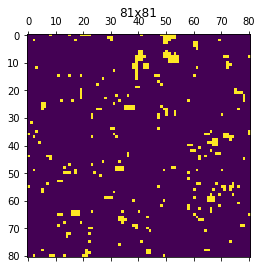

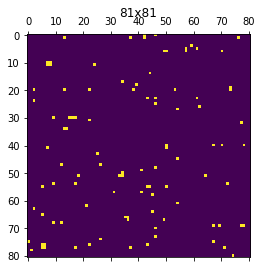

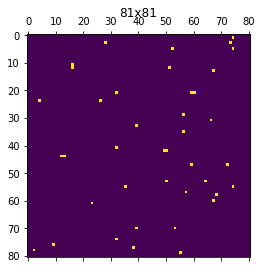

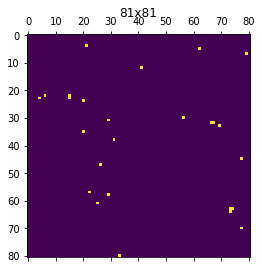

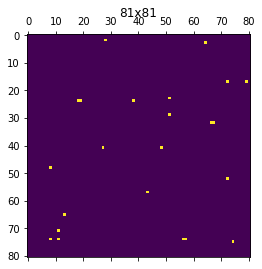

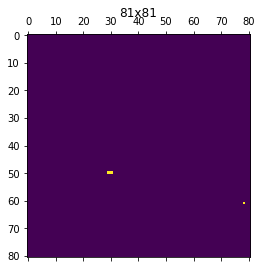

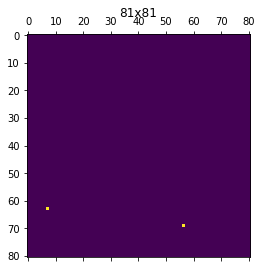

In [ ]:
#81x81 configuration snapshots
for grid in all_grids:
  plt.matshow(grid[-1])
  plt.title('81x81')

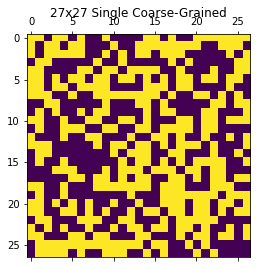

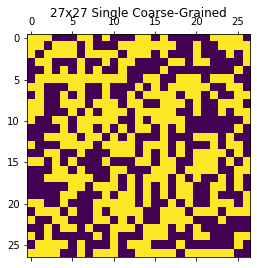

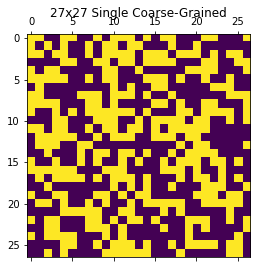

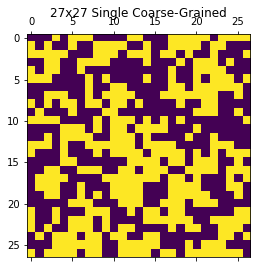

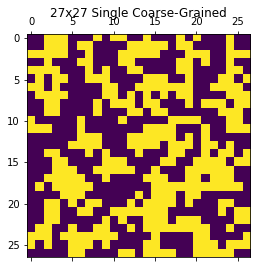

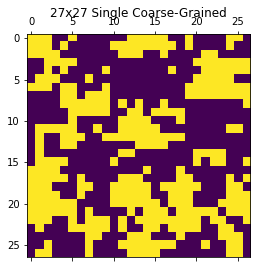

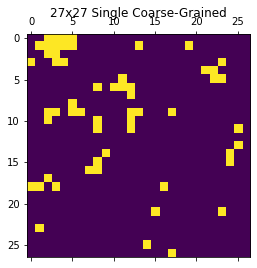

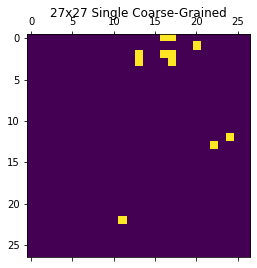

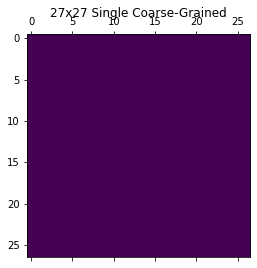

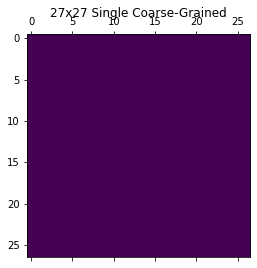

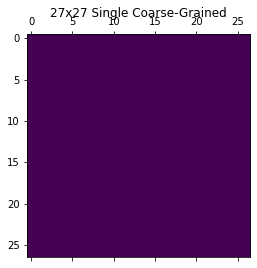

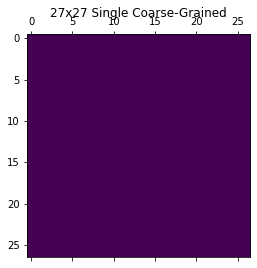

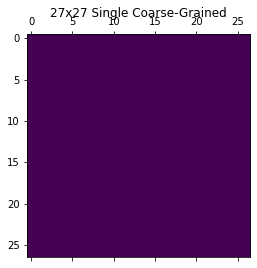

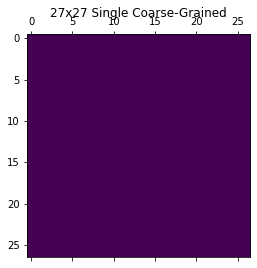

In [ ]:
#27x27 coarse-grained configuration snapshots
grids_27 = []
for grids in all_grids:
  new_grid = coarseGrain(grids[-1])
  grids_beta = []
  for grid in grids:
    grids_beta.append(coarseGrain(grid))
  grids_27.append(grids_beta)
  plt.matshow(new_grid)
  plt.title('27x27 Single Coarse-Grained')

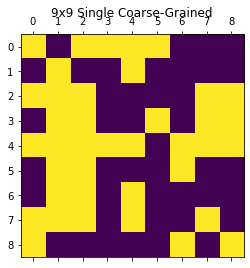

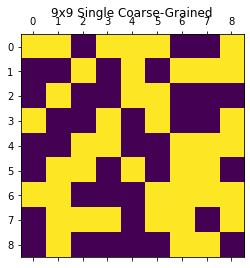

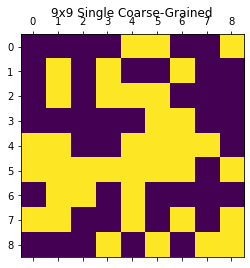

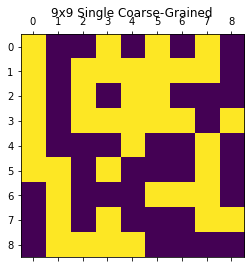

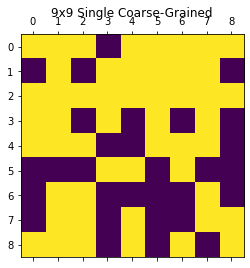

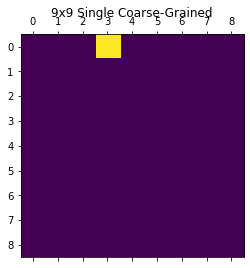

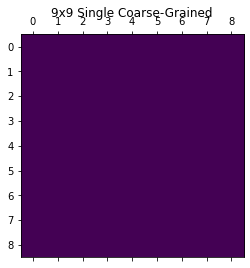

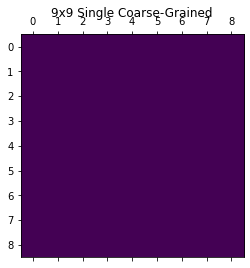

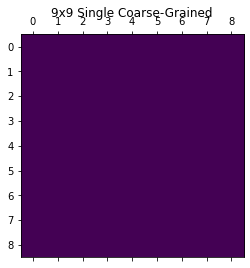

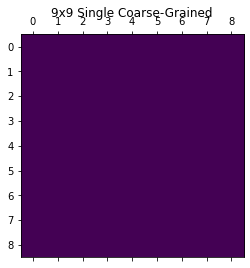

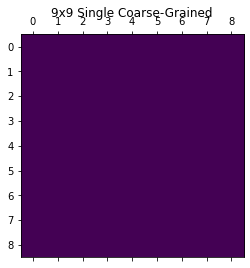

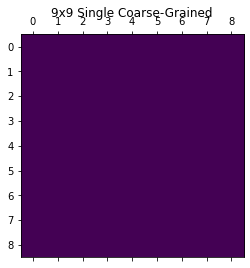

In [ ]:
#9x9 coarse-grained configuration snapshots
for grids in all_grids:
  new_grid = coarseGrain(grids[-1])
  double = coarseGrain(new_grid)
  plt.matshow(double)
  plt.title('9x9 Single Coarse-Grained')

[0.001297540514400752, 0.0014740718240533078, 0.00177264383389505, 0.002692058712284653, 0.00904809911021458, 0.03925501412875483, 0.7938542008879919, 0.9639719505858682, 0.998012249538475, 0.9995013957025696, 0.9998559651850972, 0.9999944596140099, 1.0, 1.0]
14


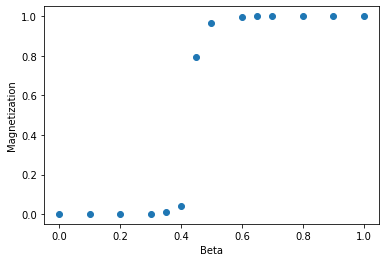

In [ ]:
avg_m_27 = []
for beta in grids_27:
  m = []
  for grid in beta:
    m.append(M(grid)**2)
  avg_m_27.append(np.average(m))

print(avg_m_27)
print(len(betaJ))
plt.scatter(betaJ, avg_m_27)
plt.xlabel('Beta')
plt.ylabel('Magnetization')
plt.show()

In [ ]:
#27x27 graph of average M^2
L = 27
#betaJ = [0, 0.2, 0.3, 0.35, 0.4, 0.45, 0.46, 0.5, 0.55, 0.6, 0.7, 0.8, 1.0]
#betaJ = [0, 0.3, 0.4, 0.5, 0.6, 100000]
betaJ = [0.0, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0]
grid = np.ones((L, L))
avg_m = []
errors_m = []
total_m = []
N = 1000

for beta in betaJ:
  print('beta: ', beta)
  grid = np.ones((L, L))
  steps = L*L
  grids = MCMC(N, steps, grid, beta)

  m, e = [], []
  for grid in grids:
    m.append(M(grid)**2)
  #if(beta == 0.4):
    #total_m.append(m)

  errors_m.append((statistics.stdev(m)/np.sqrt(N)))
  avg_m.append(np.average(m))
  #pylab.matshow(grids[-1])

beta:  0.0
beta:  0.1
beta:  0.2
beta:  0.3
beta:  0.35
beta:  0.4
beta:  0.45
beta:  0.5
beta:  0.6
beta:  0.65
beta:  0.7
beta:  0.8
beta:  0.9
beta:  1.0


14 14
[0.0, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0]


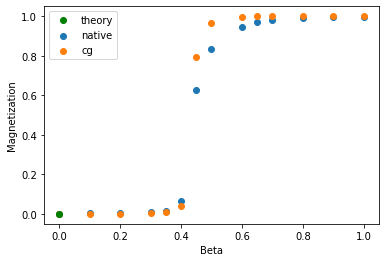

In [ ]:
print(len(avg_m), len(avg_m_27))
print(betaJ)
plt.scatter(betaJ, avg_m, label = 'native')
plt.scatter(betaJ, avg_m_27, label = 'cg')
plt.plot(0, 0, 'o', label = "theory", color='green')
plt.legend()
plt.xlabel('Beta')
plt.ylabel('Magnetization')
plt.show()

[0.0013909203716794577, 0.0021257064532001608, 0.004290688383046701, 0.009362348585907515, 0.01320236880648988, 0.06389154288027873, 0.6276073392755, 0.8321786337491482, 0.9477869610246346, 0.9703073515239008, 0.9805248278651826, 0.991836621764559, 0.9965466956773605, 0.9985600780345102]


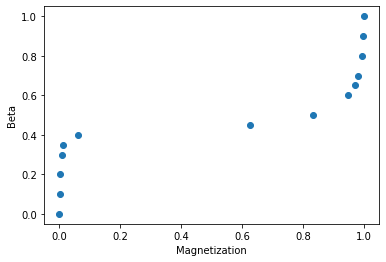

In [ ]:
from scipy import interpolate
plt.scatter(avg_m, betaJ)
print(avg_m)
plt.ylabel('Beta')
plt.xlabel('Magnetization')
plt.show()

[0.0, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0]
[-0.01270844  0.01131642  0.05195028  0.12615968  0.29380381  0.37569843
  0.49063299  0.63593408  0.97279064  1.04675305  1.06436369  1.07124238
  1.07151756  1.07151756]


"\nplt.plot(betaJ[7], closest_b[7], 'o')\nplt.arrow(betaJ[7], closest_b[7], closest_b[7] - betaJ[7], 0)\nplt.arrow(closest_b[7], closest_b[7], 0, closest_b[9] - closest_b[7])\nplt.arrow(betaJ[9], closest_b[9], closest_b[8] - betaJ[8], 0)\nplt.arrow(closest_b[8], closest_b[8], 0, closest_b[9] - closest_b[8])\n"

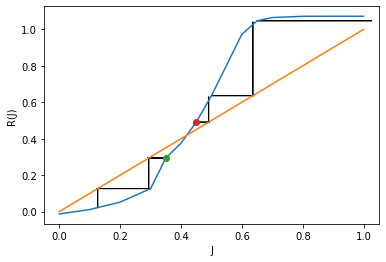

In [ ]:
f = interpolate.interp1d(avg_m, betaJ, fill_value="extrapolate")
closest_b = f(avg_m_27)

plt.plot(betaJ, closest_b)
print(betaJ)
print(closest_b)
plt.xlabel('J')
plt.ylabel('R(J)')
plt.plot(betaJ, betaJ)

plt.plot(betaJ[4], closest_b[4], 'o')
plt.arrow(betaJ[4], closest_b[4], closest_b[4] - betaJ[4], 0)
plt.arrow(closest_b[4], closest_b[4], 0, closest_b[3] - closest_b[4])
plt.arrow(betaJ[3], closest_b[3], closest_b[3] - betaJ[3], 0)
plt.arrow(closest_b[3], closest_b[3], 0, closest_b[2] - closest_b[3])

plt.plot(betaJ[6], closest_b[6], 'o')
plt.arrow(betaJ[6], closest_b[6], closest_b[6] - betaJ[6], 0)
plt.arrow(closest_b[6], closest_b[6], 0, closest_b[7] - closest_b[6])
plt.arrow(betaJ[7], closest_b[7], closest_b[7] - betaJ[7], 0)
plt.arrow(closest_b[7], closest_b[7], 0, closest_b[9] - closest_b[7])
plt.arrow(betaJ[9], closest_b[9], closest_b[8] - betaJ[8], 0)

In [ ]:
grid = np.random.choice([-1, 1], (81,81))
print(grid)
grid2 = np.ones((27, 27))
print(calcEnergy(grid), calcEnergy(grid2))

[[-1 -1  1 ... -1 -1  1]
 [-1  1 -1 ... -1 -1 -1]
 [-1  1 -1 ... -1 -1  1]
 ...
 [ 1 -1  1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1  1  1]
 [ 1 -1 -1 ...  1  1  1]]
58.0 1458.0


[0.0, 0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0]
2.9060217958039107


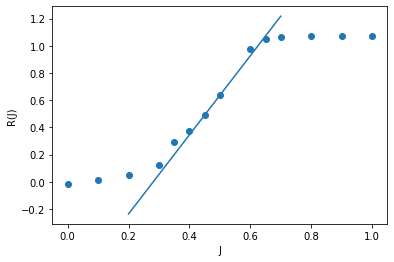

In [ ]:
#betaJ = [0, 0.2, 0.3, 0.35, 0.4, 0.45, 0.46, 0.5, 0.55, 0.6, 0.7, 0.8, 1.0]
m = abs(closest_b[7] - closest_b[6])/(abs(betaJ[7] - betaJ[6]))
c = closest_b[6] - m*(betaJ[6])
y = [(elem*m + c) for elem in betaJ]
print(betaJ)
plt.scatter(betaJ, closest_b)
plt.xlabel('J')
plt.ylabel('R(J)')
plt.plot(betaJ[2:len(betaJ)-3], y[2:len(betaJ)-3])
print(m)

In [ ]:
v = np.log(3)/np.log(m)
print(v)

1.0298347101997296
